In [1]:
import pandas as pd

df_shai_exuviae=pd.read_csv('/Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/fifty_one/measurements/data/Results-shai-exuviae.csv')
df_analysis=pd.read_csv('/Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/fifty_one/measurements/length_analysis_new_split.csv')


# Remove 'colored_' prefix from image_name column
df_analysis['image_name'] = df_analysis['image_name'].str.replace('colored_', '')





In [2]:
# Remove prefix from Label column
df_shai_exuviae['Label'] = df_shai_exuviae['Label'].str.replace('Shai - exuviae:', '')

# Create columns for big and small lengths
df_shai_exuviae['is_big'] = df_shai_exuviae.groupby('Label')['Length'].transform(lambda x: x == x.max() if len(x) > 1 else False)
df_shai_exuviae['is_small'] = df_shai_exuviae.groupby('Label')['Length'].transform(lambda x: x == x.min() if len(x) > 1 else False)

df_shai_exuviae

,,Label,Area,Mean,Min,Max,BX,BY,Width,Height,Angle,Length,is_big,is_small
0,1,undistorted_GX010191_5_190,1030,131.196,29.609,166.129,3660,36,41,1029,-87.772,1028.778,False,False
1,2,undistorted_GX010191_8_309,791,156.202,55.333,175.122,2456,1376,733,297,22.017,789.582,False,True
2,3,undistorted_GX010191_8_309,914,136.620,84.361,170.768,3860,1736,157,901,-80.166,913.420,True,False
3,4,undistorted_GX010191_10_370,697,127.490,40.000,189.921,3092,1716,245,653,69.482,696.161,False,True
4,5,undistorted_GX010191_10_370,940,154.028,81.667,180.810,4084,1360,837,429,-27.111,939.191,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,undistorted_GX010194_26_373,1218,150.946,81.667,179.000,1072,1548,1053,613,30.189,1217.065,False,False
81,82,undistorted_GX010194_39_513,1309,156.869,47.333,179.686,2436,1320,33,1309,-91.401,1308.391,False,False
82,83,undistorted_GX010194_60_836,1735,134.509,47.373,170.459,2208,2544,1733,77,177.487,1733.667,True,False
83,84,undistorted_GX010194_60_836,1380,156.280,64.333,181.049,2608,52,561,1261,66.038,1378.840,False,True


In [10]:
# Create a merged dataframe by matching Label with image_name
merged_df = pd.merge(
    df_shai_exuviae,
    df_analysis,
    left_on='Label',
    right_on='image_name',
    how='inner'
)

# Calculate the absolute difference between Length and pixels_total_length
merged_df['length_diff'] = abs(merged_df['Length'] - merged_df['pixels_total_length'])

# Filter for rows where the lengths are close (e.g. within 10% difference)
threshold = 0.1# 10% threshold

# Group by Label to find images with multiple detections
duplicate_labels = merged_df.groupby('Label').filter(lambda x: len(x) > 1)['Label'].unique()

# For images with multiple detections, match the detections with size classes
for label in duplicate_labels:
    # Get rows for this label
    label_rows = merged_df[merged_df['Label'] == label]
    
    # Get the big and small detections from Shai's data
    shai_big = label_rows[label_rows['is_big']]['Length'].values[0] if any(label_rows['is_big']) else None
    shai_small = label_rows[label_rows['is_small']]['Length'].values[0] if any(label_rows['is_small']) else None
    
    # Get the big and small detections from our measurements
    our_big = label_rows[label_rows['lobster_size'] == 'big']['pixels_total_length'].values[0] if any(label_rows['lobster_size'] == 'big') else None
    our_small = label_rows[label_rows['lobster_size'] == 'small']['pixels_total_length'].values[0] if any(label_rows['lobster_size'] == 'small') else None
    
    # Update is_big and is_small flags based on our size classes
    merged_df.loc[merged_df['Label'] == label, 'is_big'] = merged_df.loc[merged_df['Label'] == label, 'lobster_size'] == 'big'
    merged_df.loc[merged_df['Label'] == label, 'is_small'] = merged_df.loc[merged_df['Label'] == label, 'lobster_size'] == 'small'

# Recalculate length difference after matching
merged_df['length_diff'] = abs(merged_df['Length'] - merged_df['pixels_total_length'])



close_matches = merged_df[merged_df['length_diff'] / merged_df['Length'] < threshold]

# Sort by length difference to see best matches first
close_matches = close_matches.sort_values('length_diff')

# Display results
print(f"Found {len(close_matches)} matches where lengths are within {threshold*100}% difference")
display(close_matches)


Found 51 matches where lengths are within 10.0% difference


,,Label,Area,Mean,Min,Max,BX,BY,Width,Height,...,is_small,image_name,lobster_size,total_length,carapace_length,eye_x,eye_y,pixels_total_length,pixels_carapace_length,length_diff
48,31,undistorted_GX010191_37_1242,720,148.253,98.659,170.629,2764,948,221,685,...,True,undistorted_GX010191_37_1242,small,139.2,34.5,2927.6,1243.5,719.0,178.1,0.490
2,2,undistorted_GX010191_8_309,791,156.202,55.333,175.122,2456,1376,733,297,...,True,undistorted_GX010191_8_309,small,154.8,35.7,2879.4,1465.9,790.1,181.9,0.518
24,19,undistorted_GX010191_32_305,791,147.524,87.960,176.063,2516,1328,741,277,...,True,undistorted_GX010191_32_305,small,154.2,36.9,2897.1,1454.2,786.3,187.9,3.495
97,67,undistorted_GX010193_11_1065,1742,130.953,78.167,171.020,2152,1256,973,1445,...,False,undistorted_GX010193_11_1065,big,184.3,44.3,2701.3,2017.7,1745.4,419.2,4.733
75,50,undistorted_GX010191_100_1250,734,145.590,35.000,185.270,2776,1088,137,721,...,True,undistorted_GX010191_100_1250,small,143.0,38.0,2853.8,1416.3,739.4,196.5,6.668
102,72,undistorted_GX010193_27_1553,1767,128.617,46.667,162.577,1672,108,253,1749,...,False,undistorted_GX010193_27_1553,big,186.6,47.3,1853.2,762.9,1774.1,449.8,8.029
114,82,undistorted_GX010194_39_513,1309,156.869,47.333,179.686,2436,1320,33,1309,...,False,undistorted_GX010194_39_513,small,144.1,33.7,2407.7,2016.2,1300.3,303.9,8.091
70,48,undistorted_GX010191_94_1132,823,153.479,28.338,180.844,3052,368,777,273,...,False,undistorted_GX010191_94_1132,big,156.7,34.1,3728.6,1885.2,832.0,181.0,9.711
40,27,undistorted_GX010191_35_1167,771,154.688,47.898,184.515,2844,644,761,125,...,True,undistorted_GX010191_35_1167,small,149.2,34.8,3262.8,683.9,759.4,177.2,10.649
22,18,undistorted_GX010191_31_283,947,138.038,53.297,171.404,3776,1492,105,941,...,False,undistorted_GX010191_31_283,big,174.8,37.3,3796.4,1995.6,931.8,198.7,13.936


In [11]:
# Select only the specified columns
selected_columns = ['image_name', 'BX', 'BY', 'Width', 'Height', 'Length', 
                   'lobster_size', 'total_length', 'pixels_total_length', 'length_diff','is_big','is_small']

new_df = close_matches[selected_columns]

# Display filtered results
display(new_df)


,image_name,BX,BY,Width,Height,Length,lobster_size,total_length,pixels_total_length,length_diff,is_big,is_small
48,undistorted_GX010191_37_1242,2764,948,221,685,718.510,small,139.2,719.0,0.490,False,True
2,undistorted_GX010191_8_309,2456,1376,733,297,789.582,small,154.8,790.1,0.518,False,True
24,undistorted_GX010191_32_305,2516,1328,741,277,789.795,small,154.2,786.3,3.495,False,True
97,undistorted_GX010193_11_1065,2152,1256,973,1445,1740.667,big,184.3,1745.4,4.733,False,False
75,undistorted_GX010191_100_1250,2776,1088,137,721,732.732,small,143.0,739.4,6.668,False,True
102,undistorted_GX010193_27_1553,1672,108,253,1749,1766.071,big,186.6,1774.1,8.029,True,False
114,undistorted_GX010194_39_513,2436,1320,33,1309,1308.391,small,144.1,1300.3,8.091,False,False
70,undistorted_GX010191_94_1132,3052,368,777,273,822.289,big,156.7,832.0,9.711,True,False
40,undistorted_GX010191_35_1167,2844,644,761,125,770.049,small,149.2,759.4,10.649,False,True
22,undistorted_GX010191_31_283,3776,1492,105,941,945.736,big,174.8,931.8,13.936,True,False


In [12]:
# Add real length based on size class
new_df['real_length'] = new_df['lobster_size'].map({'small': 145, 'big': 180})

# Calculate absolute difference between real length and total length
new_df['real_length_abs_diff'] = abs(new_df['total_length'] - new_df['real_length'])

# Calculate relative difference as percentage
new_df['real_length_rel_diff'] = (new_df['real_length_abs_diff'] / new_df['real_length']) * 100

display(new_df)


/var/folders/9w/y40_ws0n1_n_hby5lpbrj1_m0000gn/T/ipykernel_23052/2314326851.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9w/y40_ws0n1_n_hby5lpbrj1_m0000gn/T/ipykernel_23052/2314326851.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9w/y40_ws0n1_n_hby5lpbrj1_m0000gn/T/ipykernel_23052/2314326851.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,image_name,BX,BY,Width,Height,Length,lobster_size,total_length,pixels_total_length,length_diff,is_big,is_small,real_length,real_length_abs_diff,real_length_rel_diff
48,undistorted_GX010191_37_1242,2764,948,221,685,718.510,small,139.2,719.0,0.490,False,True,145,5.8,4.000000
2,undistorted_GX010191_8_309,2456,1376,733,297,789.582,small,154.8,790.1,0.518,False,True,145,9.8,6.758621
24,undistorted_GX010191_32_305,2516,1328,741,277,789.795,small,154.2,786.3,3.495,False,True,145,9.2,6.344828
97,undistorted_GX010193_11_1065,2152,1256,973,1445,1740.667,big,184.3,1745.4,4.733,False,False,180,4.3,2.388889
75,undistorted_GX010191_100_1250,2776,1088,137,721,732.732,small,143.0,739.4,6.668,False,True,145,2.0,1.379310
102,undistorted_GX010193_27_1553,1672,108,253,1749,1766.071,big,186.6,1774.1,8.029,True,False,180,6.6,3.666667
114,undistorted_GX010194_39_513,2436,1320,33,1309,1308.391,small,144.1,1300.3,8.091,False,False,145,0.9,0.620690
70,undistorted_GX010191_94_1132,3052,368,777,273,822.289,big,156.7,832.0,9.711,True,False,180,23.3,12.944444
40,undistorted_GX010191_35_1167,2844,644,761,125,770.049,small,149.2,759.4,10.649,False,True,145,4.2,2.896552
22,undistorted_GX010191_31_283,3776,1492,105,941,945.736,big,174.8,931.8,13.936,True,False,180,5.2,2.888889


In [13]:
# Calculate absolute difference between pixels_total_length and Length
new_df['pixel_abs_diff'] = abs(new_df['pixels_total_length'] - new_df['Length'])

# Calculate relative difference as percentage 
new_df['pixel_rel_diff'] = (new_df['pixel_abs_diff'] / new_df['Length']) * 100

display(new_df)


/var/folders/9w/y40_ws0n1_n_hby5lpbrj1_m0000gn/T/ipykernel_23052/2007285494.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9w/y40_ws0n1_n_hby5lpbrj1_m0000gn/T/ipykernel_23052/2007285494.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,image_name,BX,BY,Width,Height,Length,lobster_size,total_length,pixels_total_length,length_diff,is_big,is_small,real_length,real_length_abs_diff,real_length_rel_diff,pixel_abs_diff,pixel_rel_diff
48,undistorted_GX010191_37_1242,2764,948,221,685,718.510,small,139.2,719.0,0.490,False,True,145,5.8,4.000000,0.490,0.068197
2,undistorted_GX010191_8_309,2456,1376,733,297,789.582,small,154.8,790.1,0.518,False,True,145,9.8,6.758621,0.518,0.065604
24,undistorted_GX010191_32_305,2516,1328,741,277,789.795,small,154.2,786.3,3.495,False,True,145,9.2,6.344828,3.495,0.442520
97,undistorted_GX010193_11_1065,2152,1256,973,1445,1740.667,big,184.3,1745.4,4.733,False,False,180,4.3,2.388889,4.733,0.271907
75,undistorted_GX010191_100_1250,2776,1088,137,721,732.732,small,143.0,739.4,6.668,False,True,145,2.0,1.379310,6.668,0.910019
102,undistorted_GX010193_27_1553,1672,108,253,1749,1766.071,big,186.6,1774.1,8.029,True,False,180,6.6,3.666667,8.029,0.454625
114,undistorted_GX010194_39_513,2436,1320,33,1309,1308.391,small,144.1,1300.3,8.091,False,False,145,0.9,0.620690,8.091,0.618393
70,undistorted_GX010191_94_1132,3052,368,777,273,822.289,big,156.7,832.0,9.711,True,False,180,23.3,12.944444,9.711,1.180972
40,undistorted_GX010191_35_1167,2844,644,761,125,770.049,small,149.2,759.4,10.649,False,True,145,4.2,2.896552,10.649,1.382899
22,undistorted_GX010191_31_283,3776,1492,105,941,945.736,big,174.8,931.8,13.936,True,False,180,5.2,2.888889,13.936,1.473561


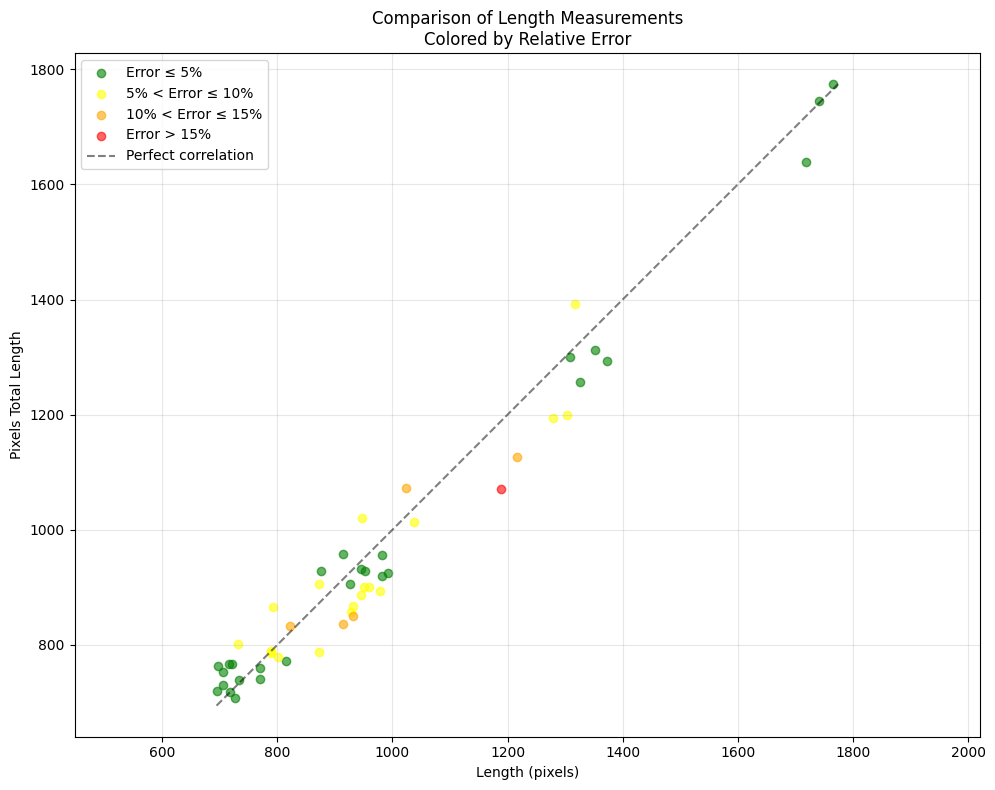

In [14]:
# Create scatter plot comparing Length vs pixels_total_length

import matplotlib.pyplot as plt



plt.figure(figsize=(10, 8))

# Plot points with different colors based on relative error
error_thresholds = [5, 10, 15]
colors = ['green', 'yellow', 'orange', 'red']

for i in range(len(error_thresholds) + 1):
    if i == 0:
        mask = new_df['real_length_rel_diff'] <= error_thresholds[0]
        label = f'Error ≤ {error_thresholds[0]}%'
    elif i == len(error_thresholds):
        mask = new_df['real_length_rel_diff'] > error_thresholds[-1]
        label = f'Error > {error_thresholds[-1]}%'
    else:
        mask = (new_df['real_length_rel_diff'] > error_thresholds[i-1]) & \
               (new_df['real_length_rel_diff'] <= error_thresholds[i])
        label = f'{error_thresholds[i-1]}% < Error ≤ {error_thresholds[i]}%'
    
    plt.scatter(new_df[mask]['Length'], 
               new_df[mask]['pixels_total_length'],
               c=colors[i],
               alpha=0.6,
               label=label)

# Add diagonal line representing perfect correlation
min_val = min(new_df['Length'].min(), new_df['pixels_total_length'].min())
max_val = max(new_df['Length'].max(), new_df['pixels_total_length'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect correlation')

plt.xlabel('Length (pixels)')
plt.ylabel('Pixels Total Length')
plt.title('Comparison of Length Measurements\nColored by Relative Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Make plot square
plt.axis('equal')
plt.tight_layout()
plt.show()


In [15]:
import plotly.express as px
import plotly.graph_objects as go

# Create scatter plot with plotly
fig = go.Figure()

# Plot points with different colors based on relative error
error_thresholds = [5, 10, 15]
colors = ['green', 'yellow', 'orange', 'red']

for i in range(len(error_thresholds) + 1):
    if i == 0:
        mask = new_df['real_length_rel_diff'] <= error_thresholds[0]
        label = f'Error ≤ {error_thresholds[0]}%'
    elif i == len(error_thresholds):
        mask = new_df['real_length_rel_diff'] > error_thresholds[-1]
        label = f'Error > {error_thresholds[-1]}%'
    else:
        mask = (new_df['real_length_rel_diff'] > error_thresholds[i-1]) & \
               (new_df['real_length_rel_diff'] <= error_thresholds[i])
        label = f'{error_thresholds[i-1]}% < Error ≤ {error_thresholds[i]}%'
    
    fig.add_trace(go.Scatter(
        x=new_df[mask]['Length'],
        y=new_df[mask]['pixels_total_length'],
        mode='markers',
        name=label,
        marker=dict(
            color=colors[i],
            size=10,
            opacity=0.6
        ),
        hovertemplate=
        '<b>Image:</b> %{customdata[0]}<br>' +
        '<b>Pixels Total Length:</b> %{y:.1f}<br>' +
        '<b>Length:</b> %{x:.1f}<br>' +
        '<b>Total Length:</b> %{customdata[1]:.1f}<br>' +
        '<b>Lobster Size:</b> %{customdata[2]}<br>' +
        '<b>Pixel Rel Diff:</b> %{customdata[3]:.1f}%<br>' +
        '<b>Pixel Abs Diff:</b> %{customdata[4]:.1f}<br>' +
        '<b>Real Length Abs Diff:</b> %{customdata[5]:.1f}<br>' +
        '<b>Real Length Rel Diff:</b> %{customdata[6]:.1f}%<br>',
        customdata=list(zip(new_df[mask]['image_name'], 
                          new_df[mask]['total_length'],
                          new_df[mask]['lobster_size'],
                          new_df[mask]['pixel_rel_diff'],
                          new_df[mask]['pixel_abs_diff'],
                          new_df[mask]['real_length_abs_diff'],
                          new_df[mask]['real_length_rel_diff']
                          )
                          )
    ))

# Add diagonal line for perfect correlation
min_val = min(new_df['Length'].min(), new_df['pixels_total_length'].min())
max_val = max(new_df['Length'].max(), new_df['pixels_total_length'].max())
fig.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    name='Perfect correlation',
    line=dict(color='black', dash='dash', width=1),
    opacity=0.5
))

# Update layout
fig.update_layout(
    title='Comparison of Length Measurements<br>Colored by Relative Error',
    xaxis_title='Length (pixels)',
    yaxis_title='Pixels Total Length',
    showlegend=True,
    width=800,
    height=800,
    xaxis=dict(range=[min_val, max_val]),
    yaxis=dict(range=[min_val, max_val]),
    plot_bgcolor='white'
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()


In [35]:
# Group by lobster size and calculate summary statistics
size_stats = new_df.groupby('lobster_size').agg({
    'real_length_abs_diff': ['count', 'mean', 'std', 'min', 'max'],
    'real_length_rel_diff': ['mean', 'std', 'min', 'max']
}).round(2)

# Rename columns for clarity
size_stats.columns = [
    'n', 
    'abs_diff_mean',
    'abs_diff_std', 
    'abs_diff_min',
    'abs_diff_max',
    'rel_diff_mean',
    'rel_diff_std',
    'rel_diff_min', 
    'rel_diff_max'
]

# Reset index to make lobster_size a column
size_stats = size_stats.reset_index()

print("\nSummary Statistics by Lobster Size:")
print("===================================")
print(size_stats.to_string(index=False))

# Calculate overall statistics
print("\nOverall Statistics:")
print("==================")
print(f"Total samples: {len(new_df)}")
print(f"Mean absolute difference: {new_df['real_length_abs_diff'].mean():.2f}")
print(f"Mean relative difference: {new_df['real_length_rel_diff'].mean():.2f}%")
print(f"Standard deviation of absolute difference: {new_df['real_length_abs_diff'].std():.2f}")
print(f"Standard deviation of relative difference: {new_df['real_length_rel_diff'].std():.2f}%")

# Calculate z-scores for the relative differences
z_scores = stats.zscore(new_df['real_length_rel_diff'])

# Define outlier threshold (e.g., z-score > 3 or < -3)
outlier_threshold = 3
outliers_df = new_df[abs(z_scores) > outlier_threshold].copy()

# Sort outliers by absolute z-score to show most extreme first
outliers_df['z_score'] = z_scores[abs(z_scores) > outlier_threshold]
outliers_df = outliers_df.sort_values(by='z_score', key=abs, ascending=False)

print("\nOutliers (z-score > 3):")
print("=======================")
print(f"Number of outliers: {len(outliers_df)}")
print("\nOutlier Details:")
print(outliers_df[['image_name', 'pixels_total_length', 'real_length', 'real_length_rel_diff', 'z_score']].to_string())

# Calculate IQR outliers
Q1 = new_df['real_length_rel_diff'].quantile(0.25)
Q3 = new_df['real_length_rel_diff'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers_df = new_df[(new_df['real_length_rel_diff'] < (Q1 - 1.5 * IQR)) | 
                         (new_df['real_length_rel_diff'] > (Q3 + 1.5 * IQR))].copy()

print("\nOutliers (IQR method):")
print("=====================")
print(f"Number of outliers: {len(iqr_outliers_df)}")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {(Q1 - 1.5 * IQR):.2f}")
print(f"Upper bound: {(Q3 + 1.5 * IQR):.2f}")
print("\nOutlier Details:")
print(iqr_outliers_df[['image_name', 'pixels_total_length', 'real_length', 'real_length_rel_diff']].to_string())



Summary Statistics by Lobster Size:
lobster_size  n  abs_diff_mean  abs_diff_std  abs_diff_min  abs_diff_max  rel_diff_mean  rel_diff_std  rel_diff_min  rel_diff_max
         big 25          10.88          6.62           0.3          23.3           6.05          3.68          0.17         12.94
       small 26           6.69          5.60           0.2          24.4           4.61          3.86          0.14         16.83

Overall Statistics:
Total samples: 51
Mean absolute difference: 8.75
Mean relative difference: 5.32%
Standard deviation of absolute difference: 6.42
Standard deviation of relative difference: 3.80%

Outliers (z-score > 3):
Number of outliers: 1

Outlier Details:
                       image_name  pixels_total_length  real_length  real_length_rel_diff   z_score
101  undistorted_GX010193_20_1365               1070.7          145             16.827586  3.056356

Outliers (IQR method):
Number of outliers: 2
Q1: 2.80
Q3: 6.83
IQR: 4.03
Lower bound: -3.25
Upper bound: 12.

In [38]:
# Remove outliers based on IQR method
clean_df = new_df[(new_df['real_length_rel_diff'] >= (Q1 - 1.5 * IQR)) & 
                  (new_df['real_length_rel_diff'] <= (Q3 + 1.5 * IQR))].copy()

print("\nStatistics without outliers:")
print("===========================")
print(f"Total samples: {len(clean_df)}")
print(f"Mean absolute difference: {clean_df['real_length_abs_diff'].mean():.2f}")
print(f"Mean relative difference: {clean_df['real_length_rel_diff'].mean():.2f}%")
print(f"Standard deviation of absolute difference: {clean_df['real_length_abs_diff'].std():.2f}")
print(f"Standard deviation of relative difference: {clean_df['real_length_rel_diff'].std():.2f}%")

# Calculate size-based statistics without outliers
size_stats_clean = clean_df.groupby('lobster_size').agg({
    'real_length_abs_diff': ['mean', 'std'],
    'real_length_rel_diff': ['mean', 'std'],
    'image_name': 'count'
}).round(3)

size_stats_clean.columns = ['Mean Abs Diff', 'Std Abs Diff', 'Mean Rel Diff %', 'Std Rel Diff %', 'Count']
print("\nSize-based statistics without outliers:")
print("=====================================")
print(size_stats_clean.to_string())



Statistics without outliers:
Total samples: 49
Mean absolute difference: 8.13
Mean relative difference: 4.93%
Standard deviation of absolute difference: 5.75
Standard deviation of relative difference: 3.31%

Size-based statistics without outliers:
              Mean Abs Diff  Std Abs Diff  Mean Rel Diff %  Std Rel Diff %  Count
lobster_size                                                                     
big                  10.367         6.229            5.759           3.461     24
small                 5.980         4.362            4.124           3.008     25


In [37]:
# Group data by error ranges
error_ranges = [(0, 5), (5, 10), (10, 15), (15, float('inf'))]
range_labels = ['≤5%', '5-10%', '10-15%', '>15%']

print("Images grouped by relative error ranges:")
print("======================================")

for (lower, upper), label in zip(error_ranges, range_labels):
    mask = (new_df['real_length_rel_diff'] > lower) & (new_df['real_length_rel_diff'] <= upper)
    group_df = new_df[mask]
    
    print(f"\nError range {label}:")
    print("-" * (13 + len(label)))
    print(f"Count: {len(group_df)}")
    if len(group_df) > 0:
        print("\nDetails:")
        print(group_df[['image_name', 'real_length_rel_diff','lobster_size','pixel_rel_diff']].sort_values('real_length_rel_diff','pixel_rel_diff').to_string())


Images grouped by relative error ranges:

Error range ≤5%:
----------------
Count: 27

Details:
                        image_name  real_length_rel_diff lobster_size
44    undistorted_GX010191_36_1195              0.137931        small
3       undistorted_GX010191_8_309              0.166667          big
98    undistorted_GX010193_18_1289              0.551724        small
114    undistorted_GX010194_39_513              0.620690        small
49    undistorted_GX010191_37_1242              0.722222          big
36     undistorted_GX010191_35_367              0.758621        small
106   undistorted_GX010193_28_1584              0.965517        small
75   undistorted_GX010191_100_1250              1.379310        small
16     undistorted_GX010191_17_509              1.862069        small
97    undistorted_GX010193_11_1065              2.388889          big
83   undistorted_GX010191_105_1312              2.482759        small
29     undistorted_GX010191_34_350              2.555556        

In [31]:
# Split data into two groups based on image name
circle_df = new_df[new_df['image_name'].str.contains('191')]
square_df = new_df[~new_df['image_name'].str.contains('191')]

from plotly.subplots import make_subplots

import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
import numpy as np
from scipy import stats



# Create two subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Circle Pond (GX010191)', 'Square Pond'))

# Helper function to add traces for each dataset
def add_error_traces(df, fig, col=1):
    error_thresholds = [5, 10, 15]
    colors = ['green', 'yellow', 'orange', 'red']
    
    for i in range(len(error_thresholds) + 1):
        if i == 0:
            mask = df['real_length_rel_diff'] <= error_thresholds[0]
            label = f'Error ≤ {error_thresholds[0]}%'
        elif i == len(error_thresholds):
            mask = df['real_length_rel_diff'] > error_thresholds[-1]
            label = f'Error > {error_thresholds[-1]}%'
        else:
            mask = (df['real_length_rel_diff'] > error_thresholds[i-1]) & \
                   (df['real_length_rel_diff'] <= error_thresholds[i])
            label = f'{error_thresholds[i-1]}% < Error ≤ {error_thresholds[i]}%'
        
        fig.add_trace(
            go.Scatter(
                x=df[mask]['pixel_rel_diff'],
                y=df[mask]['real_length_rel_diff'],
                mode='markers',
                name=label,
                marker=dict(color=colors[i], size=10, opacity=0.6),
                hovertemplate=
                '<b>Image:</b> %{customdata[0]}<br>' +
                '<b>Pixels Total Length:</b> %{customdata[8]:.1f}<br>' +
                '<b>Length:</b> %{customdata[7]:.1f}<br>' +
                '<b>Total Length:</b> %{customdata[1]:.1f}<br>' +
                '<b>Lobster Size:</b> %{customdata[2]}<br>' +
                '<b>Pixel Rel Diff:</b> %{customdata[3]:.1f}%<br>' +
                '<b>Pixel Abs Diff:</b> %{customdata[4]:.1f}<br>' +
                '<b>Real Length Abs Diff:</b> %{customdata[5]:.1f}<br>' +
                '<b>Real Length Rel Diff:</b> %{customdata[6]:.1f}%<br>',
                customdata=list(zip(df[mask]['image_name'], 
                                  df[mask]['total_length'],
                                  df[mask]['lobster_size'],
                                  df[mask]['pixel_rel_diff'],
                                  df[mask]['pixel_abs_diff'],
                                  df[mask]['real_length_abs_diff'],
                                  df[mask]['real_length_rel_diff'],
                                  df[mask]['Length'],
                                  df[mask]['pixels_total_length'])),
                showlegend=(col==1),  # Only show legend for first column
            ),
            row=1, col=col
        )

    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df['pixel_rel_diff'], df['real_length_rel_diff']
    )
    x_range = np.linspace(df['pixel_rel_diff'].min(), df['pixel_rel_diff'].max(), 100)
    y_range = slope * x_range + intercept
    
    fig.add_trace(
        go.Scatter(
            x=x_range,
            y=y_range,
            mode='lines',
            name=f'Regression (R²={r_value**2:.3f})',
            line=dict(color='black', width=2),
            showlegend=(col==1)
        ),
        row=1, col=col
    )
    
    return r_value**2, slope, intercept

# Add traces for both datasets
r2_circle, slope_circle, intercept_circle = add_error_traces(circle_df, fig, col=1)
r2_square, slope_square, intercept_square = add_error_traces(square_df, fig, col=2)

# Update layout
fig.update_layout(
    title='Relationship between Pixel and Real Length Relative Differences by Pond Type',
    width=1600,
    height=800,
    plot_bgcolor='white'
)

# Update axes
for i in [1, 2]:
    fig.update_xaxes(
        title='Pixel Relative Difference (%)',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        row=1, col=i
    )
    fig.update_yaxes(
        title='Real Length Relative Difference (%)',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        row=1, col=i
    )

# Print statistics
print("Circle Pond Statistics:")
print(f"R-squared: {r2_circle:.3f}")
print(f"Slope: {slope_circle:.3f}")
print(f"Intercept: {intercept_circle:.3f}")
print("\nSquare Pond Statistics:")
print(f"R-squared: {r2_square:.3f}") 
print(f"Slope: {slope_square:.3f}")
print(f"Intercept: {intercept_square:.3f}")

fig.show()

Circle Pond Statistics:
R-squared: 0.076
Slope: 0.320
Intercept: 3.625

Square Pond Statistics:
R-squared: 0.605
Slope: 1.254
Intercept: -0.343


In [17]:
import numpy as np
from scipy import stats

# Remove outliers from the linear relationship between pixel_rel_diff and real_length_rel_diff
# Calculate residuals from linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    new_df['pixel_rel_diff'], 
    new_df['real_length_rel_diff']
)
predicted = slope * new_df['pixel_rel_diff'] + intercept
residuals = new_df['real_length_rel_diff'] - predicted

# Remove points with residuals more than 2 standard deviations from mean
residual_std = np.std(residuals)
residual_mean = np.mean(residuals)
new_df_clean = new_df[
    (residuals >= residual_mean - 2*residual_std) & 
    (residuals <= residual_mean + 2*residual_std)
]

# Calculate new correlation and regression after removing outliers
correlation_clean = new_df_clean['pixel_rel_diff'].corr(new_df_clean['real_length_rel_diff'])
slope_clean, intercept_clean, r_value_clean, p_value_clean, std_err_clean = stats.linregress(
    new_df_clean['pixel_rel_diff'], 
    new_df_clean['real_length_rel_diff']
)

# Create scatter plot with plotly
fig = go.Figure()

# Plot points with different colors based on relative error
error_thresholds = [5, 10, 15]
colors = ['green', 'yellow', 'orange', 'red']

for i in range(len(error_thresholds) + 1):
    if i == 0:
        mask = new_df_clean['real_length_rel_diff'] <= error_thresholds[0]
        label = f'Error ≤ {error_thresholds[0]}%'
    elif i == len(error_thresholds):
        mask = new_df_clean['real_length_rel_diff'] > error_thresholds[-1]
        label = f'Error > {error_thresholds[-1]}%'
    else:
        mask = (new_df_clean['real_length_rel_diff'] > error_thresholds[i-1]) & \
               (new_df_clean['real_length_rel_diff'] <= error_thresholds[i])
        label = f'{error_thresholds[i-1]}% < Error ≤ {error_thresholds[i]}%'
    
    fig.add_trace(go.Scatter(
        x=new_df_clean[mask]['pixel_rel_diff'],
        y=new_df_clean[mask]['real_length_rel_diff'],
        mode='markers',
        name=label,
        marker=dict(
            color=colors[i],
            size=10,
            opacity=0.6
        ),
        hovertemplate=
        '<b>Image:</b> %{customdata[0]}<br>' +
        '<b>Pixels Total Length:</b> %{customdata[8]:.1f}<br>' +
        '<b>Length:</b> %{customdata[7]:.1f}<br>' +
        '<b>Total Length:</b> %{customdata[1]:.1f}<br>' +
        '<b>Lobster Size:</b> %{customdata[2]}<br>' +
        '<b>Pixel Rel Diff:</b> %{customdata[3]:.1f}%<br>' +
        '<b>Pixel Abs Diff:</b> %{customdata[4]:.1f}<br>' +
        '<b>Real Length Abs Diff:</b> %{customdata[5]:.1f}<br>' +
        '<b>Real Length Rel Diff:</b> %{customdata[6]:.1f}%<br>',
        customdata=list(zip(new_df_clean[mask]['image_name'], 
                          new_df_clean[mask]['total_length'],
                          new_df_clean[mask]['lobster_size'],
                          new_df_clean[mask]['pixel_rel_diff'],
                          new_df_clean[mask]['pixel_abs_diff'],
                          new_df_clean[mask]['real_length_abs_diff'],
                          new_df_clean[mask]['real_length_rel_diff'],
                          new_df_clean[mask]['Length'],
                          new_df_clean[mask]['pixels_total_length']
                          )
                     )
    ))

# Add regression line
x_range = np.linspace(new_df_clean['pixel_rel_diff'].min(), new_df_clean['pixel_rel_diff'].max(), 100)
y_range = slope_clean * x_range + intercept_clean

fig.add_trace(go.Scatter(
    x=x_range,
    y=y_range,
    mode='lines',
    name=f'Regression line (y = {slope_clean:.3f}x + {intercept_clean:.3f})',
    line=dict(color='black', width=2),
))

# Update layout
fig.update_layout(
    title=f'Relationship after Removing Outliers<br>Correlation: {correlation_clean:.3f}, R²: {r_value_clean**2:.3f}',
    xaxis_title='Pixel Relative Difference (%)',
    yaxis_title='Real Length Relative Difference (%)',
    showlegend=True,
    width=800,
    height=800,
    plot_bgcolor='white'
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

print(f"Statistical Analysis after removing outliers:")
print(f"Number of points removed: {len(new_df) - len(new_df_clean)}")
print(f"Correlation coefficient: {correlation_clean:.3f}")
print(f"Linear regression results:")
print(f"Slope: {slope_clean:.3f}")
print(f"Intercept: {intercept_clean:.3f}")
print(f"R-squared: {r_value_clean**2:.3f}")
print(f"P-value: {p_value_clean:.3e}")
print(f"Standard error: {std_err_clean:.3f}")

fig.show()


Statistical Analysis after removing outliers:
Number of points removed: 2
Correlation coefficient: 0.462
Linear regression results:
Slope: 0.530
Intercept: 2.334
R-squared: 0.213
P-value: 8.447e-04
Standard error: 0.149


In [29]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go

# Prepare the data
X = new_df[['pixel_rel_diff']].values
y = new_df['real_length_rel_diff'].values

# Create and train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Create points for prediction
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = rf_model.predict(X_plot)

# Create scatter plot with plotly
fig = go.Figure()

# Plot original points with different colors based on relative error
error_thresholds = [5, 10, 15]
colors = ['green', 'yellow', 'orange', 'red']

for i in range(len(error_thresholds) + 1):
    if i == 0:
        mask = new_df['real_length_rel_diff'] <= error_thresholds[0]
        label = f'Error ≤ {error_thresholds[0]}%'
    elif i == len(error_thresholds):
        mask = new_df['real_length_rel_diff'] > error_thresholds[-1]
        label = f'Error > {error_thresholds[-1]}%'
    else:
        mask = (new_df['real_length_rel_diff'] > error_thresholds[i-1]) & \
               (new_df['real_length_rel_diff'] <= error_thresholds[i])
        label = f'{error_thresholds[i-1]}% < Error ≤ {error_thresholds[i]}%'
    
    fig.add_trace(go.Scatter(
        x=new_df[mask]['pixel_rel_diff'],
        y=new_df[mask]['real_length_rel_diff'],
        mode='markers',
        name=label,
        marker=dict(
            color=colors[i],
            size=10,
            opacity=0.6
        ),
        hovertemplate=
        '<b>Image:</b> %{customdata[0]}<br>' +
        '<b>Pixels Total Length:</b> %{customdata[8]:.1f}<br>' +
        '<b>Length:</b> %{customdata[7]:.1f}<br>' +
        '<b>Total Length:</b> %{customdata[1]:.1f}<br>' +
        '<b>Lobster Size:</b> %{customdata[2]}<br>' +
        '<b>Pixel Rel Diff:</b> %{customdata[3]:.1f}%<br>' +
        '<b>Pixel Abs Diff:</b> %{customdata[4]:.1f}<br>' +
        '<b>Real Length Abs Diff:</b> %{customdata[5]:.1f}<br>' +
        '<b>Real Length Rel Diff:</b> %{customdata[6]:.1f}%<br>',
        customdata=list(zip(new_df[mask]['image_name'], 
                          new_df[mask]['total_length'],
                          new_df[mask]['lobster_size'],
                          new_df[mask]['pixel_rel_diff'],
                          new_df[mask]['pixel_abs_diff'],
                          new_df[mask]['real_length_abs_diff'],
                          new_df[mask]['real_length_rel_diff'],
                          new_df[mask]['Length'],
                          new_df[mask]['pixels_total_length']
                          )
                     )
    ))

# Add random forest prediction line
fig.add_trace(go.Scatter(
    x=X_plot.flatten(),
    y=y_pred,
    mode='lines',
    name='Random Forest Prediction',
    line=dict(color='black', width=2),
))

# Calculate R² score
r2_score = rf_model.score(X, y)

# Update layout
fig.update_layout(
    title=f'Random Forest Model of Pixel vs Real Length Relative Differences<br>R²: {r2_score:.3f}',
    xaxis_title='Pixel Relative Difference (%)',
    yaxis_title='Real Length Relative Difference (%)',
    showlegend=True,
    width=800,
    height=800,
    plot_bgcolor='white'
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Print model performance metrics
print(f"Random Forest Model Performance:")
print(f"R² Score: {r2_score:.3f}")

fig.show()

Random Forest Model Performance:
R² Score: 0.841


In [27]:
# Create an even smoother prediction line by generating more points
X_smooth = np.linspace(X.min(), X.max(), 2000).reshape(-1, 1)  # Doubled number of points
y_smooth_pred = rf_model.predict(X_smooth)

# Create scatter plot with smoother prediction line
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=X.flatten(),
    y=y,
    mode='markers',
    name='Data Points',
    marker=dict(
        size=8,
        color='blue',
        opacity=0.5  # Slightly reduced opacity
    ),
    hovertemplate=
        '<b>Image:</b> %{customdata[0]}<br>' +
        '<b>Total Length:</b> %{customdata[1]:.1f}<br>' +
        '<b>Lobster Size:</b> %{customdata[2]}<br>' +
        '<b>Pixel Rel Diff:</b> %{customdata[3]:.1f}%<br>' +
        '<b>Pixel Abs Diff:</b> %{customdata[4]:.1f}<br>' +
        '<b>Real Length Abs Diff:</b> %{customdata[5]:.1f}<br>' +
        '<b>Real Length Rel Diff:</b> %{customdata[6]:.1f}%<br>',
    customdata=list(zip(new_df['image_name'], 
                      new_df['total_length'],
                      new_df['lobster_size'],
                      new_df['pixel_rel_diff'],
                      new_df['pixel_abs_diff'],
                      new_df['real_length_abs_diff'],
                      new_df['real_length_rel_diff'],
                      new_df['Length'],
                      new_df['pixels_total_length']
                      )
                 )
))

# Add smoother random forest prediction line with increased smoothness
fig.add_trace(go.Scatter(
    x=X_smooth.flatten(),
    y=y_smooth_pred,
    mode='lines',
    name='Random Forest Prediction',
    line=dict(
        color='black', 
        width=2,
        shape='spline',  # Added spline interpolation
        smoothing=1.3    # Increased smoothing factor
    )
))

# Calculate R² score
r2_score = rf_model.score(X, y)

# Update layout
fig.update_layout(
    title=f'Random Forest Model of Pixel vs Real Length Relative Differences<br>R²: {r2_score:.3f}',
    xaxis_title='Pixel Relative Difference (%)',
    yaxis_title='Real Length Relative Difference (%)',
    showlegend=True,
    width=800,
    height=800,
    plot_bgcolor='white'
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Print model performance metrics
print(f"Random Forest Model Performance:")
print(f"R² Score: {r2_score:.3f}")

fig.show()


Random Forest Model Performance:
R² Score: 0.841


In [22]:
#statistic analysis relative error
import numpy as np
from scipy import stats

# Calculate mean and standard deviation of relative error
mean_rel_error = np.mean(new_df['real_length_rel_diff'])

print(f"Mean relative error: {mean_rel_error:.3f}%")
print(f"Standard deviation of relative error: {np.std(new_df['real_length_rel_diff']):.3f}%")

# Calculate median and interquartile range of relative error
median_rel_error = np.median(new_df['real_length_rel_diff'])

print(f"Median relative error: {median_rel_error:.3f}%")
print(f"Interquartile range of relative error: {np.percentile(new_df['real_length_rel_diff'], 25)}% to {np.percentile(new_df['real_length_rel_diff'], 75)}%")

# Calculate percentage of errors within different thresholds
thresholds = [5, 10, 15]



Mean relative error: 5.316%
Standard deviation of relative error: 3.767%
Median relative error: 4.667%
Interquartile range of relative error: 2.7959770114942515% to 6.827586206896555%


In [21]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

# Prepare the data
X = new_df['pixel_rel_diff'].values.reshape(-1, 1)
y = new_df['real_length_rel_diff'].values

# Create polynomial features (degree=2 for quadratic)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Generate points for smooth curve
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly_features.transform(X_smooth)
y_smooth = poly_reg.predict(X_smooth_poly)

# Calculate R² score
r2_score = poly_reg.score(X_poly, y)

# Create scatter plot with plotly
fig = go.Figure()

# Plot original points with different colors based on relative error
error_thresholds = [5, 10, 15]
colors = ['green', 'yellow', 'orange', 'red']

for i in range(len(error_thresholds) + 1):
    if i == 0:
        mask = new_df['real_length_rel_diff'] <= error_thresholds[0]
        label = f'Error ≤ {error_thresholds[0]}%'
    elif i == len(error_thresholds):
        mask = new_df['real_length_rel_diff'] > error_thresholds[-1]
        label = f'Error > {error_thresholds[-1]}%'
    else:
        mask = (new_df['real_length_rel_diff'] > error_thresholds[i-1]) & \
               (new_df['real_length_rel_diff'] <= error_thresholds[i])
        label = f'{error_thresholds[i-1]}% < Error ≤ {error_thresholds[i]}%'
    
    fig.add_trace(go.Scatter(
        x=new_df[mask]['pixel_rel_diff'],
        y=new_df[mask]['real_length_rel_diff'],
        mode='markers',
        name=label,
        marker=dict(
            color=colors[i],
            size=10,
            opacity=0.6
        )
    ))

# Add quadratic regression curve
fig.add_trace(go.Scatter(
    x=X_smooth.flatten(),
    y=y_smooth,
    mode='lines',
    name=f'Quadratic fit (R² = {r2_score:.3f})',
    line=dict(color='black', width=2)
))

# Update layout
fig.update_layout(
    title=f'Quadratic Regression of Pixel vs Real Length Relative Differences<br>R²: {r2_score:.3f}',
    xaxis_title='Pixel Relative Difference (%)',
    yaxis_title='Real Length Relative Difference (%)',
    showlegend=True,
    width=800,
    height=800,
    plot_bgcolor='white'
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Print the quadratic equation coefficients
a = poly_reg.coef_[2]  # coefficient of x²
b = poly_reg.coef_[1]  # coefficient of x
c = poly_reg.coef_[0]  # constant term

print(f"Quadratic equation: y = {a:.4f}x² + {b:.4f}x + {c:.4f}")
print(f"R² Score: {r2_score:.3f}")

fig.show()

Quadratic equation: y = -0.8476x² + 0.9406x + 0.0000
R² Score: 0.284
